# https://towardsdatascience.com/advanced-time-series-analysis-in-python-decomposition-autocorrelation-115aa64f475e

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
CARIACO = pd.read_csv("../DATA/January/Combined_CARIACO_data_v6.csv")
CARIACO['date'] = pd.to_datetime(CARIACO['time_month'])
CARIACO = CARIACO.set_index('date')

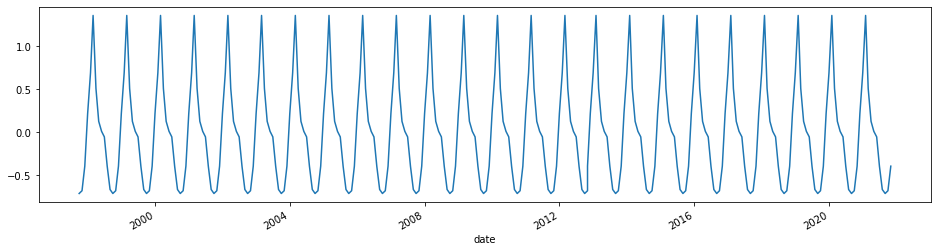

In [3]:
import statsmodels.api as sm
from matplotlib import rcParams

dataset = CARIACO["Satellite_chla"].dropna()

decomposition = sm.tsa.seasonal_decompose(dataset, period=12)

rcParams["figure.figsize"] = 16, 4
decomposition.seasonal.plot();

In [4]:
CSUB1 = CARIACO[['u10',
                 'sst',
                 'mtpr',
                 'cdir',
                 'e',
                 'Satellite_chla',
                 'Isotherm_21',
                 'Temperature_35m',
                 'Chlorophyll',
                 'Tchla',
                 'diversity'
        ]]

# Init empty dict to store decompose results
seasonality_dict = {}

for ts in CSUB1.columns:
    decompositions = sm.tsa.seasonal_decompose(CSUB1[ts].dropna(), period=12)
    # Store the results back
    seasonality_dict[ts] = decompositions.seasonal

# Plot
rcParams["figure.figsize"] = 8, 4
#pd.DataFrame(seasonality_dict)["2000":"2005"].plot(
#    subplots=True, layout=(4, 2), linewidth=3
#);

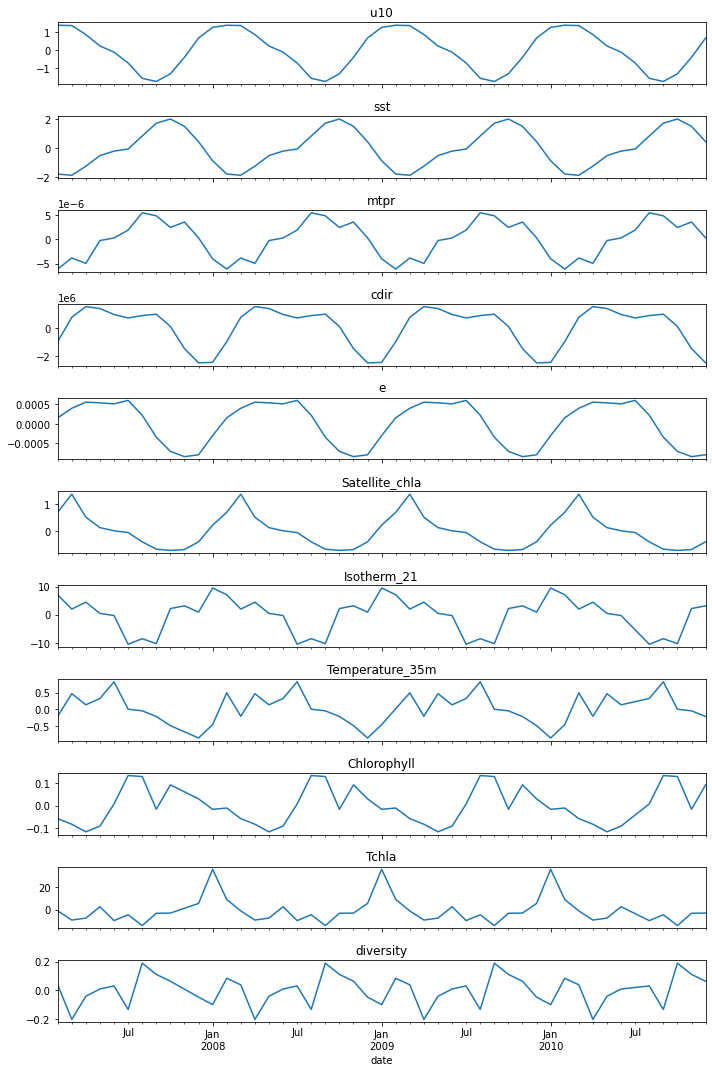

In [6]:
fig, axs = plt.subplots(11, sharex=True, figsize=(10,15))

for kname, dat, ax in zip(seasonality_dict.keys(), seasonality_dict.values(), axs):
    dat["2007":"2010"].plot(ax=ax)
    ax.set_title(kname)
    plt.tight_layout()
    

#plt.savefig("CARIACO_seasonality_signal.png") 

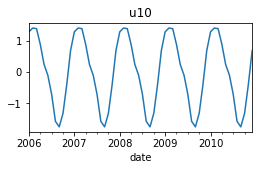

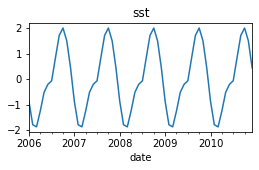

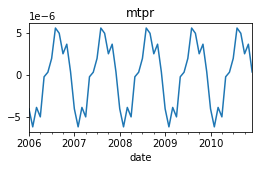

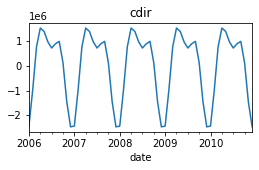

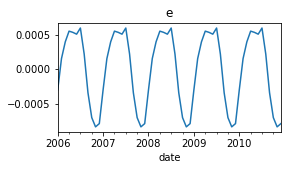

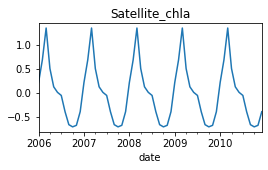

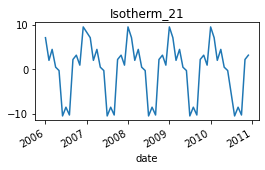

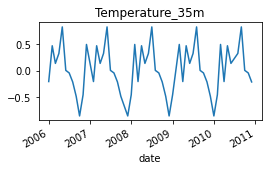

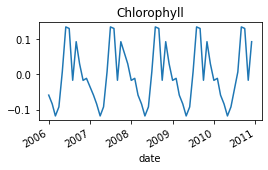

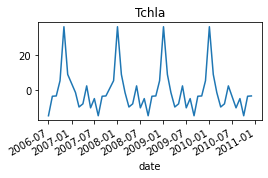

In [86]:
for kname, dat in zip(seasonality_dict.keys(), seasonality_dict.values()):
    dat["2006":"2010"].plot()
    plt.title(kname)
    plt.show()

In [7]:
trend_dict = {}



for ts in CSUB1.columns:
    decomposition = sm.tsa.seasonal_decompose(CSUB1[ts].dropna(), period=12)
    # Store back the results
    trend_dict[ts] = decomposition.trend

#pd.DataFrame(trend_dict).plot(subplots=True, layout=(4, 3), linewidth=3);

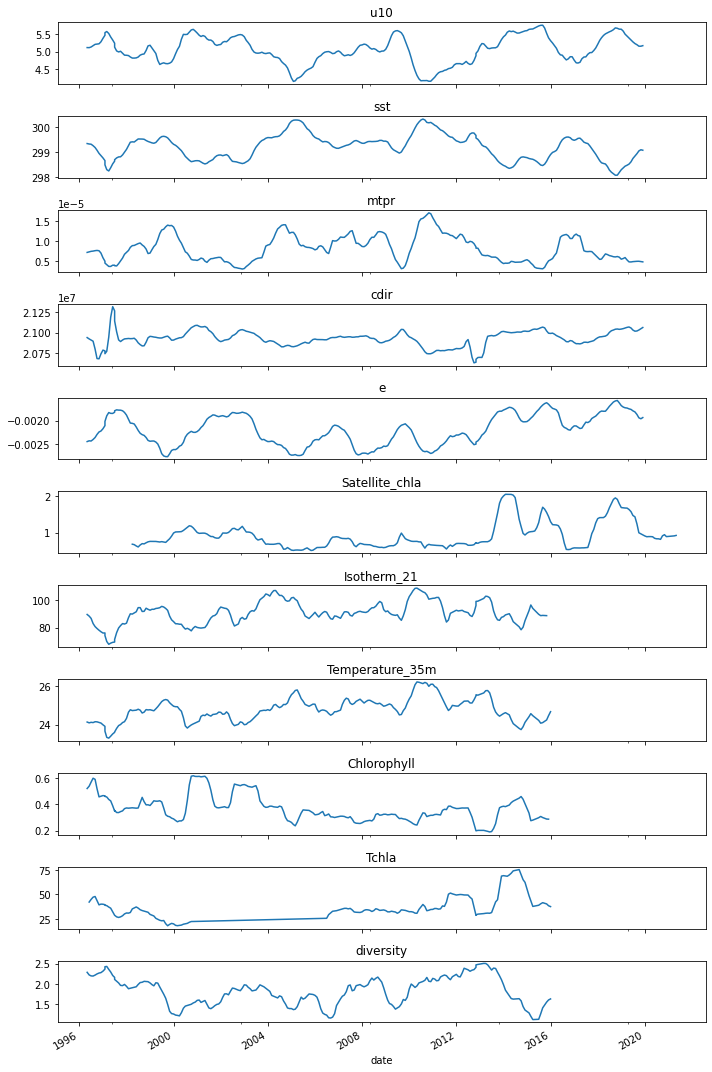

In [8]:
fig, axs = plt.subplots(11, sharex=True, figsize=(10,15))

for kname, dat, ax in zip(trend_dict.keys(), trend_dict.values(), axs):
    dat.plot(ax=ax)
    ax.set_title(kname)
    plt.tight_layout()
    

#plt.savefig("CARIACO_deseasonalized_trend.png") 

In [92]:
resid_dict = {}

for ts in CSUB1.columns:
    decomposition = sm.tsa.seasonal_decompose(CSUB1[ts].dropna(), period=12)
    resid_dict[ts] = decomposition.resid

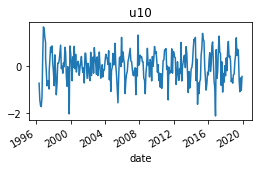

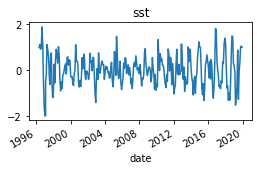

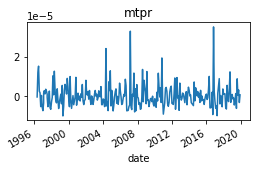

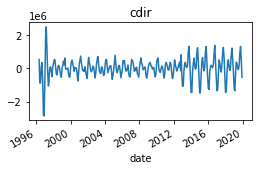

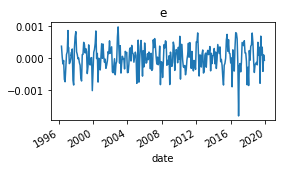

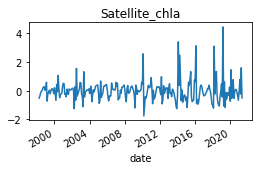

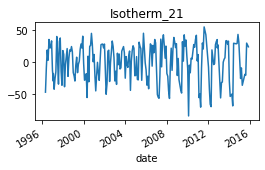

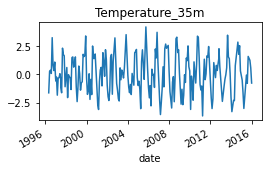

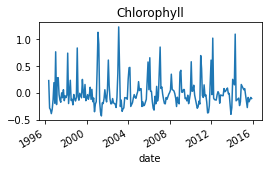

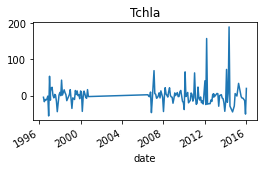

In [93]:
for kname, dat in zip(resid_dict.keys(), resid_dict.values()):
    dat.plot()
    plt.title(kname)
    plt.show()

/Users/bpo/opt/anaconda3/envs/xsimlab2/lib/python3.9/site-packages/seaborn/matrix.py:1215: UserWarning: ``square=True`` ignored in clustermap
  warnings.warn(msg)


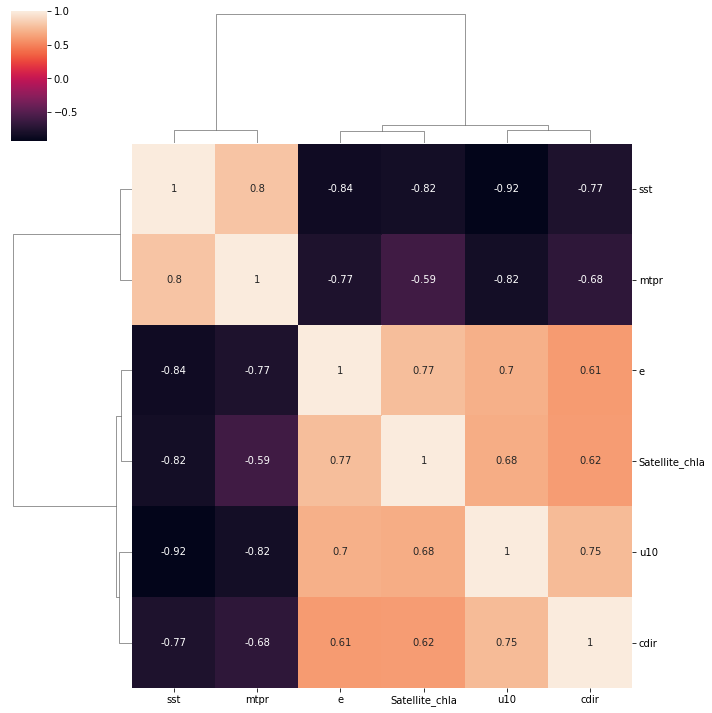

In [116]:
import seaborn as sns

CSUB2 = CARIACO[['u10',
                 'sst',
                 'mtpr',
                 'cdir',
                 'e',
                 'Satellite_chla',
        ]].dropna()


seasonality_dict = {
    ts: sm.tsa.seasonal_decompose(CSUB2[ts].dropna(), period=12).trend for ts in CSUB2.columns
}

# Compute corr matrix
seasonality_corr = pd.DataFrame(seasonality_dict).corr()

sns.clustermap(seasonality_corr, annot=True, square=True)
plt.show();

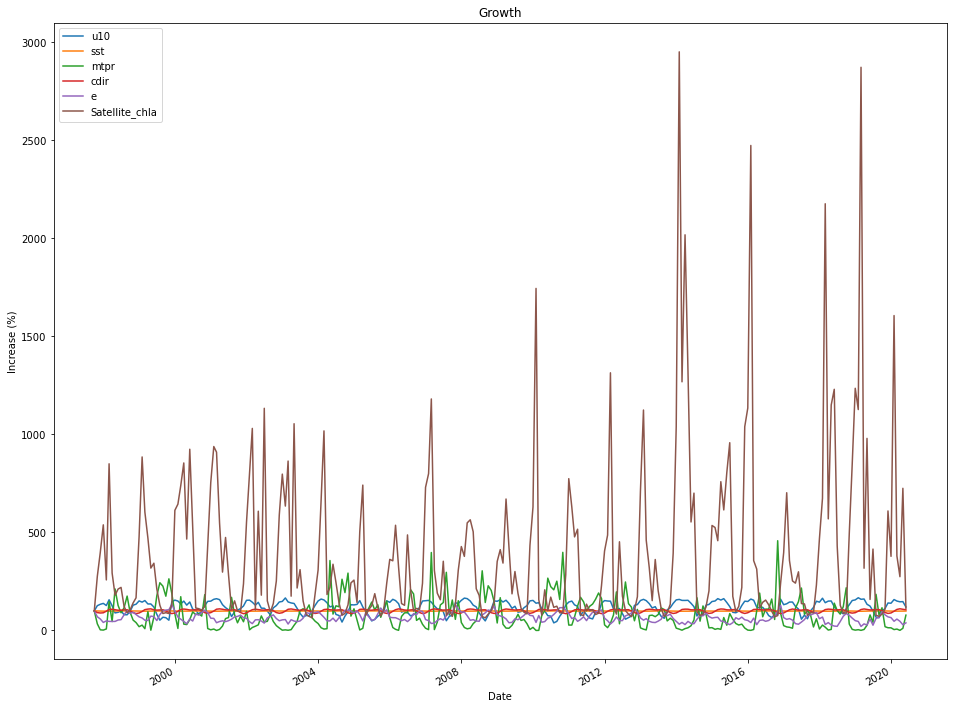

In [124]:
normalized = CSUB2.div(CSUB2.iloc[0]).mul(100)

normalized.plot(figsize=(16, 13), title="Growth")
plt.xlabel("Date")
plt.ylabel("Increase (%)");

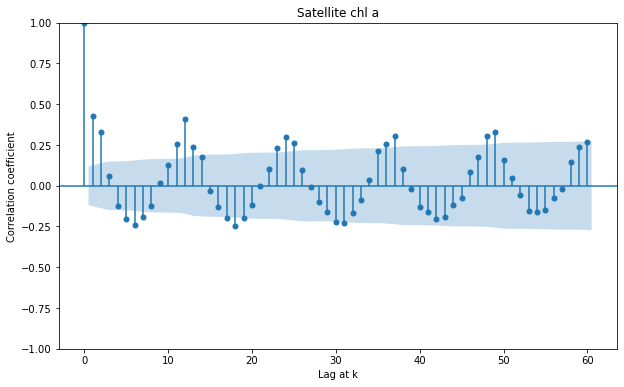

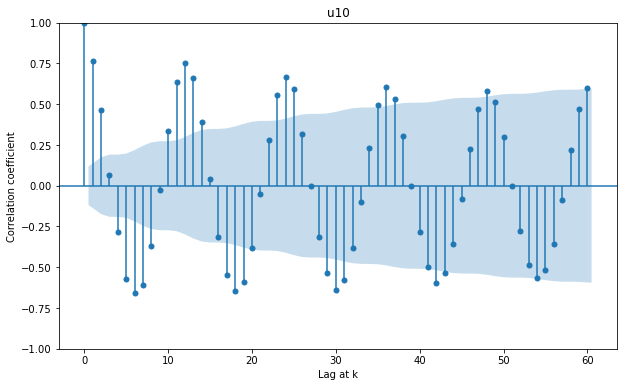

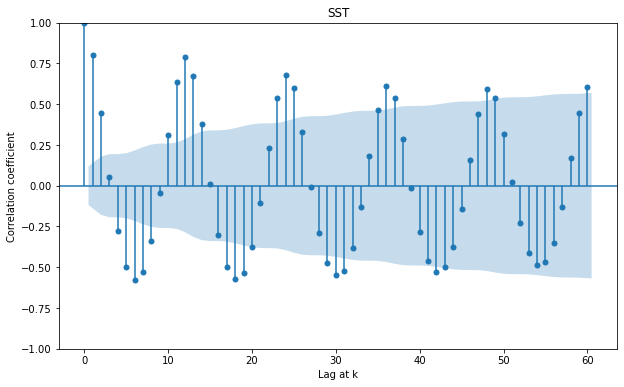

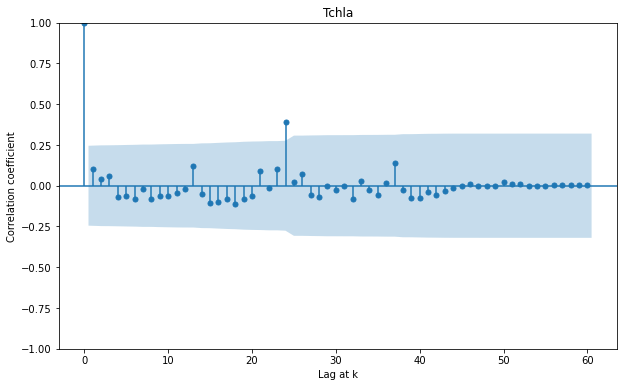

In [133]:
from statsmodels.graphics import tsaplots

rcParams["figure.figsize"] = 10, 6

# Stands for Time Series Analysis Plots (TSA Plots)
fig = tsaplots.plot_acf(CSUB2["Satellite_chla"], lags=60)

plt.xlabel("Lag at k")
plt.ylabel("Correlation coefficient")
plt.title('Satellite chl a')
plt.show()

# Stands for Time Series Analysis Plots (TSA Plots)
fig = tsaplots.plot_acf(CSUB2["u10"], lags=60)

plt.xlabel("Lag at k")
plt.ylabel("Correlation coefficient")
plt.title('u10')
plt.show()

# Stands for Time Series Analysis Plots (TSA Plots)
fig = tsaplots.plot_acf(CSUB2["sst"], lags=60)

plt.xlabel("Lag at k")
plt.ylabel("Correlation coefficient")
plt.title('SST')
plt.show()

# Stands for Time Series Analysis Plots (TSA Plots)
fig = tsaplots.plot_acf(CARIACO["Tchla"].dropna()[100:], lags=60)

plt.xlabel("Lag at k")
plt.ylabel("Correlation coefficient")
plt.title('Tchla')
plt.show()

/Users/bpo/opt/anaconda3/envs/xsimlab2/lib/python3.9/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


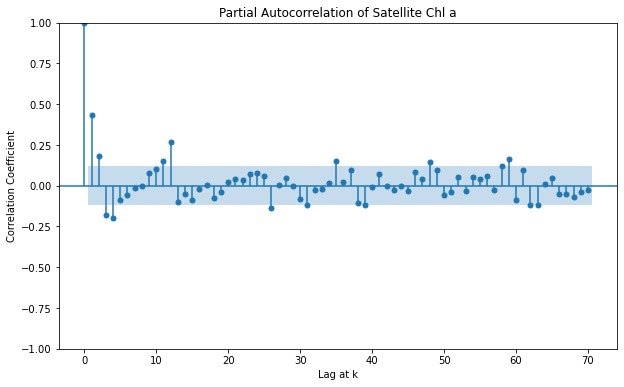

In [135]:
# Mind the extra 'p' in plot_pacf
fig = tsaplots.plot_pacf(CSUB2["Satellite_chla"], lags=70)

plt.title("Partial Autocorrelation of Satellite Chl a")
plt.xlabel("Lag at k")
plt.ylabel("Correlation Coefficient")
plt.show();